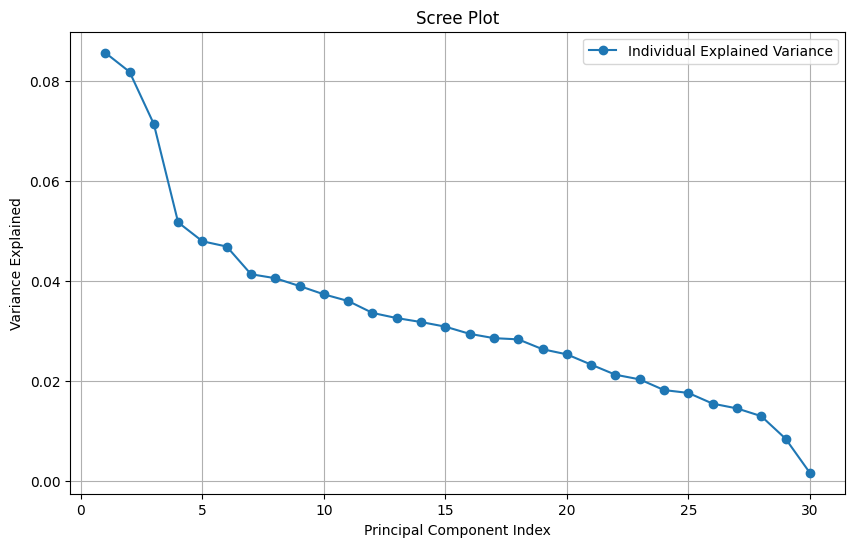

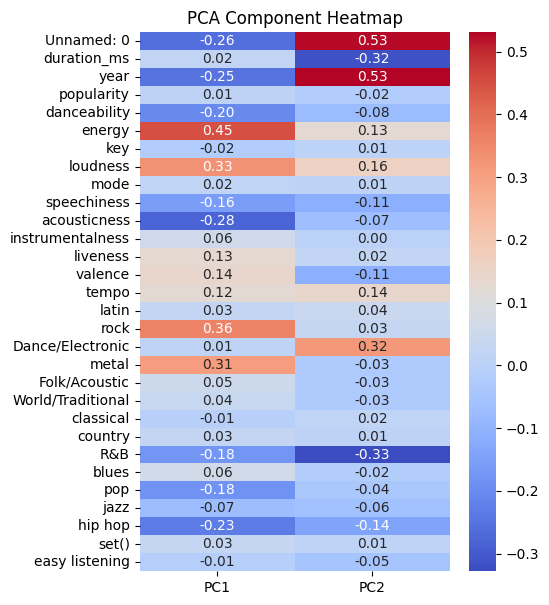

Reduced Data (PC1 and PC2):
        PC1       PC2
0  1.148571 -1.773299
1  3.864732 -0.584597
2  0.089184 -1.934487
3  5.557250 -1.144065
4  2.176687 -0.985726


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("SongDetails.csv")

# Select numerical columns for PCA (ignoring non-numerical ones)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
data = df[numerical_columns].dropna()  # Drop rows with missing values

# Step 1: Standardize the dataset
X = data.values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Step 3: Perform eigen decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select the top 2 principal components
n_components = 2
eigenvectors_top = eigenvectors[:, :n_components]

# Step 6: Project the data onto the top 2 principal components
PC1_PC2 = np.dot(X_standardized, eigenvectors_top)

# Create a DataFrame for the reduced data
reduced_df = pd.DataFrame(PC1_PC2, columns=['PC1', 'PC2'])

# Step 7: Visualize the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

# Step 8: Plot the PCA components heatmap
pca_component = pd.DataFrame(eigenvectors_top, index=numerical_columns, columns=['PC1', 'PC2'])

plt.figure(figsize=(5, 7))
sns.heatmap(pca_component, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Component Heatmap')
plt.show()

# Display the reduced data
print("Reduced Data (PC1 and PC2):")
print(reduced_df.head())
